# Marketing data set

This notebook is written to analyze the template data set obtained from https://www.kaggle.com/jackdaoud/marketing-data. It serves as a practice for myself and a demonstration of my basic data analysis knowledge.

# Basic set up

Import the packages needed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('marketing_data.csv')

In [3]:
df.iloc[:,0:15].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,104,379,111,189,218
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,5,64,7,0,37
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,11,59,15,2,30
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,0,1,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,16,24,11,0,34


In [4]:
df.iloc[:,15:].head()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,2,3,1,2,7,1,0,0,0,0,1,0,SP


# Columns information

| column | information |
|--------------------|--------------------|
|ID: |Customer's unique identifier|
|Year_Birth: |Customer's birth year|
|Education: |Customer's education level|
|Marital_Status: |Customer's marital status|
|Income: |Customer's yearly household income|
|Kidhome: | Number of children in customer's household|
|Teenhome: | Number teenagers in customer's household|
|Dt_Customer: | Date of customer's enrollment with the company|
|Recency: | Number of days since customer's last purchase|
|MntWines: | Amount spent on wine in the last 2 years|
|MntFruits: | Amount spent on fruits in the last 2 years|
|MntMeatProducts: | Amount spent on meat in the last 2 years|
|MntFishProducts: | Amount spent on fish in the last 2 years|
|MntSweetProducts: | Amount spent on sweets in the last 2 years|
|MntGoldProds: | Amount spent on gold in the last 2 years|
| NumDealsPurchases: | Number of purchases made with a discount|
| NumWebPurchases: | Number of purchases made through the company's web site|
| NumCatalogPurchases: | Number of purchases made using a catalogue|
| NumStorePurchases: | Number of purchases made directly in stores|
| NumWebVisitsMonth: | Number of visits to company's web site in the last month|
| AcceptedCmp3: | 1 if customer accepted the offer in the 3rd campaign, 0 otherwise|
| AcceptedCmp4: | 1 if customer accepted the offer in the 4th campaign, 0 otherwise|
| AcceptedCmp5: | 1 if customer accepted the offer in the 5th campaign, 0 otherwise|
| AcceptedCmp1: | 1 if customer accepted the offer in the 1st campaign, 0 otherwise|
| AcceptedCmp2: | 1 if customer accepted the offer in the 2nd campaign, 0 otherwise|
| Reponse: | 1 if customer accepted the offer in the last campaign, 0 otherwise|
| Complain: | 1 if customer complained in the last 2 years, 0 otherwise|
| Country: | Customer's location|

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

## Column preprocessing

Right now, column ' Income ' is not ready for processing.

In [8]:
df.rename( columns = { ' Income ':'Income'}, inplace = True)
# Changing the column name from ' Income' to 'Income'

In [9]:
df['Income'] = df['Income'].str.replace( '$', '')
df['Income'] = df['Income'].str.replace( ',', '')
df['Income'] = df['Income'].astype( float)
# Removing the non-numeric symbols in the data
# Changing the data type from string to float

<ipython-input-9-198f8c5a860a>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace( '$', '')


In [10]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


It will be convenient to sort Education and Marital_Status.

In [11]:
df[ 'Education'] = df['Education'].astype( 'category')
df[ 'Education'].unique() # To show the unique values of education levels.

['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']
Categories (5, object): ['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic']

In [12]:
df[ 'Education'] = df[ 'Education'].cat.reorder_categories( [ 'Basic', 'Graduation', '2n Cycle', 'Master', 'PhD'])

In [13]:
df[ 'Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4       Graduation
           ...    
2235           PhD
2236      2n Cycle
2237    Graduation
2238    Graduation
2239           PhD
Name: Education, Length: 2240, dtype: category
Categories (5, object): ['Basic', 'Graduation', '2n Cycle', 'Master', 'PhD']

In [14]:
df[ 'Marital_Status'] = df['Marital_Status'].astype( 'category')
df[ 'Marital_Status'].unique() # To show the unique values of marital statuses.

['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']
Categories (8, object): ['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO', 'Alone', 'Absurd']

In [15]:
df[ 'Martial_Status'] = df[ 'Marital_Status'].cat.reorder_categories( [ 'Alone', 'YOLO', 'Single',
                                                                      'Together', 'Married', 'Divorced',
                                                                      'Widow', 'Absurd'])

The section below attempted to identify and replace the missing values.

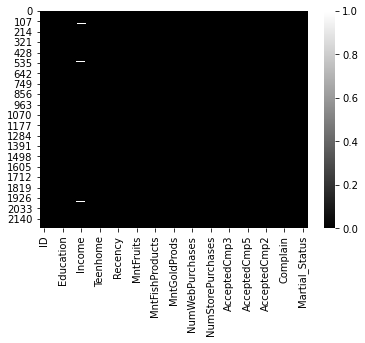

In [16]:
sns.heatmap( df.isnull(), cmap = 'gray')
plt.show()

In [17]:
df.isna().sum().sort_values( ascending = False)

Income                 24
ID                      0
NumDealsPurchases       0
Country                 0
Complain                0
Response                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Martial_Status          0
dtype: int64

Missing values were found in the column Income.

<AxesSubplot:xlabel='Income', ylabel='Count'>

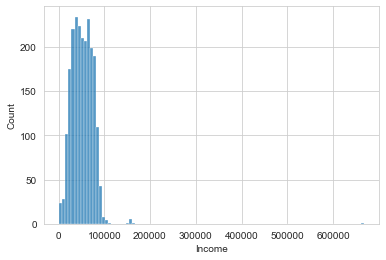

In [18]:
sns.set_style( 'whitegrid')
sns.histplot( df['Income'], kde = False, bins = 100)

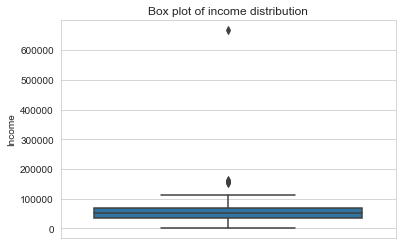

In [19]:
sns.boxplot( y = df['Income']).set_title( 'Box plot of income distribution')
plt.show()

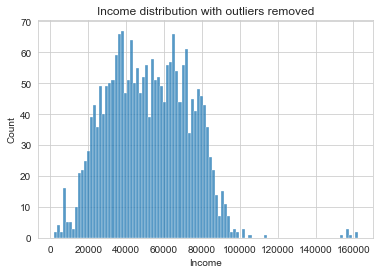

In [20]:
df = df[ df['Income'] < 400000]
sns.histplot( 
    df['Income'], kde = False, bins = 100).set_title( 'Income distribution with outliers removed')
plt.show()

In [21]:
df['Income'].fillna( np.nanmedian( df['Income']), inplace = True)

<AxesSubplot:>

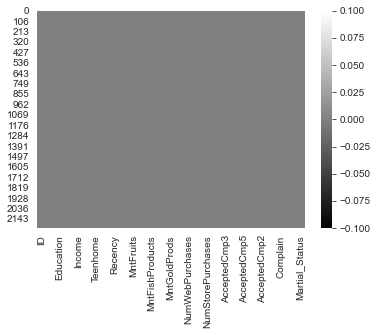

In [22]:
sns.heatmap( df.isnull(), cmap = 'gray')

In [23]:
df.isna().sum().sort_values( ascending = False)

ID                     0
NumDealsPurchases      0
Country                0
Complain               0
Response               0
AcceptedCmp2           0
AcceptedCmp1           0
AcceptedCmp5           0
AcceptedCmp4           0
AcceptedCmp3           0
NumWebVisitsMonth      0
NumStorePurchases      0
NumCatalogPurchases    0
NumWebPurchases        0
MntGoldProds           0
Year_Birth             0
MntSweetProducts       0
MntFishProducts        0
MntMeatProducts        0
MntFruits              0
MntWines               0
Recency                0
Dt_Customer            0
Teenhome               0
Kidhome                0
Income                 0
Marital_Status         0
Education              0
Martial_Status         0
dtype: int64

No more missing values

In [24]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,...,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,5586.618059,1968.816704,51969.861400,0.441535,0.505643,49.024379,305.225282,26.361625,167.063205,37.651016,...,2.671783,5.802257,5.318736,0.073589,0.074041,0.073138,0.064108,0.013544,0.150339,0.009481
std,3249.082838,11.987000,21526.320095,0.536886,0.544198,28.949608,337.345380,39.802036,224.311559,54.760822,...,2.927179,3.250974,2.425863,0.261160,0.261896,0.260421,0.245001,0.115614,0.357484,0.096929
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.500000,1959.000000,35284.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5455.000000,1970.000000,51373.000000,0.000000,0.000000,49.000000,175.000000,8.000000,68.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8419.000000,1977.000000,68487.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.500000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Martial_Status'],
      dtype='object')

At least one extreme value is observed in the Year_Birth column.

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

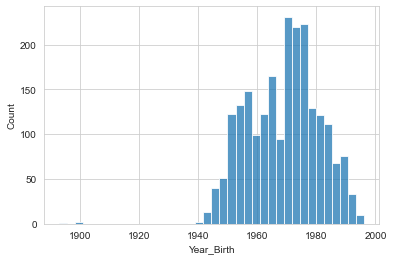

In [26]:
sns.histplot( df[ 'Year_Birth'])

In [27]:
df[ 'Year_Birth'].sort_values().head(5)

513     1893
827     1899
2233    1900
2171    1940
1740    1941
Name: Year_Birth, dtype: int64

Extries with year of birth further than 1901 will be removed as it is highly probable that they are falsely entered.

In [28]:
df = df[ df[ 'Year_Birth'] > 1900]

<AxesSubplot:xlabel='Year_Birth', ylabel='Count'>

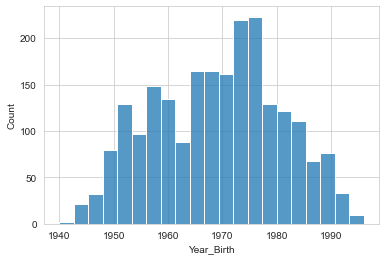

In [29]:
sns.histplot( df[ 'Year_Birth'])

# Research Question 1: customers' characteristics and sales

## Education level and sales

In [30]:
df[ ['Education', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Graduation,189,104,379,111,189,218
1,Graduation,464,5,64,7,0,37
2,Graduation,134,11,59,15,2,30
3,Graduation,10,0,1,0,0,0
4,Graduation,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,PhD,372,18,126,47,48,78
2236,2n Cycle,5,10,13,3,8,16
2237,Graduation,185,2,88,15,5,14
2238,Graduation,267,38,701,149,165,63


In [31]:
Edu_x_Sales = df.pivot_table( index = 'Education', values = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                  aggfunc = 'mean')
Edu_x_Sales

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Education,,,,,,
Basic,17.055556,11.111111,22.833333,11.444444,12.111111,7.240741
Graduation,43.448430,30.876233,50.718386,180.539013,31.313004,285.293274
2n Cycle,48.454545,29.626263,47.217172,136.378788,35.055556,202.757576
Master,31.493151,21.375342,40.189041,162.920548,20.808219,332.980822
PhD,26.716667,19.887500,32.004167,168.920833,20.256250,406.497917


<AxesSubplot:xlabel='Education'>

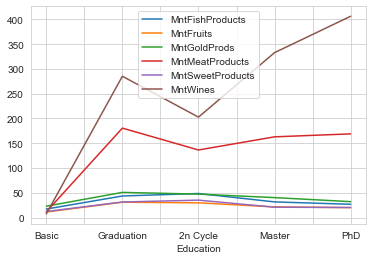

In [32]:
Edu_x_Sales.plot()

<AxesSubplot:xlabel='Education'>

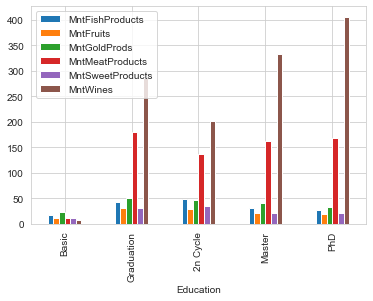

In [33]:
Edu_x_Sales.plot.bar()

It is clear that customer with basic education level purchase less. Others purchase with the most amount in Meat products and Wines. Amount spent on Gold products and Sweet products is consistently low among all groups.

## Complaint and sales

In [34]:
df[ ['Complain', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,189,104,379,111,189,218
1,0,464,5,64,7,0,37
2,0,134,11,59,15,2,30
3,0,10,0,1,0,0,0
4,0,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,0,372,18,126,47,48,78
2236,0,5,10,13,3,8,16
2237,0,185,2,88,15,5,14
2238,0,267,38,701,149,165,63


In [35]:
Cpln_x_Sales = df.pivot_table( index = 'Complain', values = [ 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'],
                  aggfunc = 'mean')
Cpln_x_Sales

,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines
Complain,,,,,,
0,37.748631,26.340785,44.074818,167.479927,27.127281,306.460766
1,26.700000,25.100000,27.600000,117.700000,18.200000,176.700000


<AxesSubplot:xlabel='Complain'>

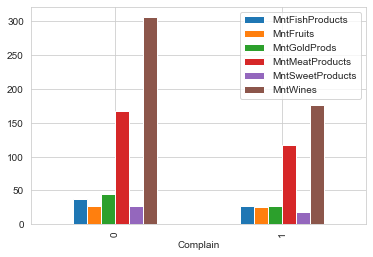

In [36]:
Cpln_x_Sales.plot.bar()

It is clearly observed that customers who made complaint in the last two years purchased less in all products.

## Income and sales

In [37]:
df[ [ 'Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,84835.0,189,104,379,111,189,218
1,57091.0,464,5,64,7,0,37
2,67267.0,134,11,59,15,2,30
3,32474.0,10,0,1,0,0,0
4,21474.0,6,16,24,11,0,34
...,...,...,...,...,...,...,...
2235,66476.0,372,18,126,47,48,78
2236,31056.0,5,10,13,3,8,16
2237,46310.0,185,2,88,15,5,14
2238,65819.0,267,38,701,149,165,63


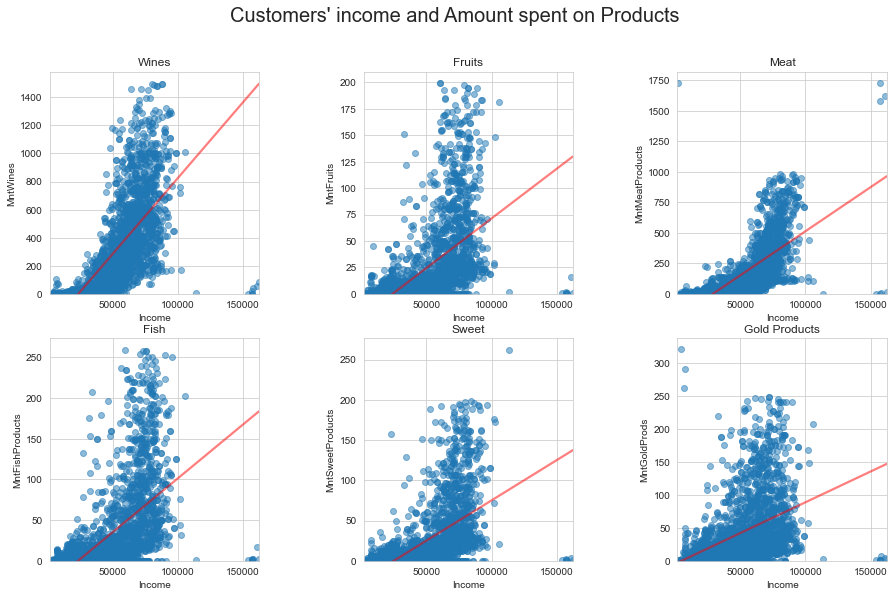

In [38]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 9))
fig.suptitle( 'Customers\' income and Amount spent on Products', fontsize = 20)
plt.subplots_adjust( wspace = 0.5, hspace = 0.2)

def desiredplot(Y, YLabel, row, col,  X = 'Income'):
    sns.regplot( x = 'Income', y = Y, data = df, ax = axs[row, col], 
            scatter_kws = { 'alpha': 0.5},line_kws = { 'color': 'red', 'alpha': 0.5}, ci = None)
    axs[ row, col].set_title( YLabel)
    axs[ row, col].set_ylim( 0, )

desiredplot( Y = 'MntWines', YLabel = 'Wines', row = 0, col = 0)
desiredplot( Y = 'MntFruits', YLabel = 'Fruits', row = 0, col = 1)
desiredplot( Y = 'MntMeatProducts', YLabel = 'Meat', row = 0, col = 2)
desiredplot( Y = 'MntFishProducts', YLabel = 'Fish', row = 1, col = 0)
desiredplot( Y = 'MntSweetProducts', YLabel = 'Sweet', row = 1, col = 1)
desiredplot( Y = 'MntGoldProds', YLabel = 'Gold Products', row = 1, col = 2)

It is observed that income is positively associated with amount spent of all types of products. Reliability of the results is questionable because of the high skewness of the data.

## Kid, teen numbers and sales

In [39]:
df[ [ 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,0,189,104,379,111,189,218
1,0,0,464,5,64,7,0,37
2,0,1,134,11,59,15,2,30
3,1,1,10,0,1,0,0,0
4,1,0,6,16,24,11,0,34
...,...,...,...,...,...,...,...,...
2235,0,1,372,18,126,47,48,78
2236,1,0,5,10,13,3,8,16
2237,1,0,185,2,88,15,5,14
2238,0,0,267,38,701,149,165,63


<AxesSubplot:xlabel='Kidhome', ylabel='count'>

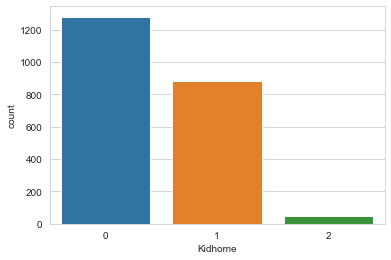

In [40]:
sns.countplot( x = 'Kidhome', data = df)

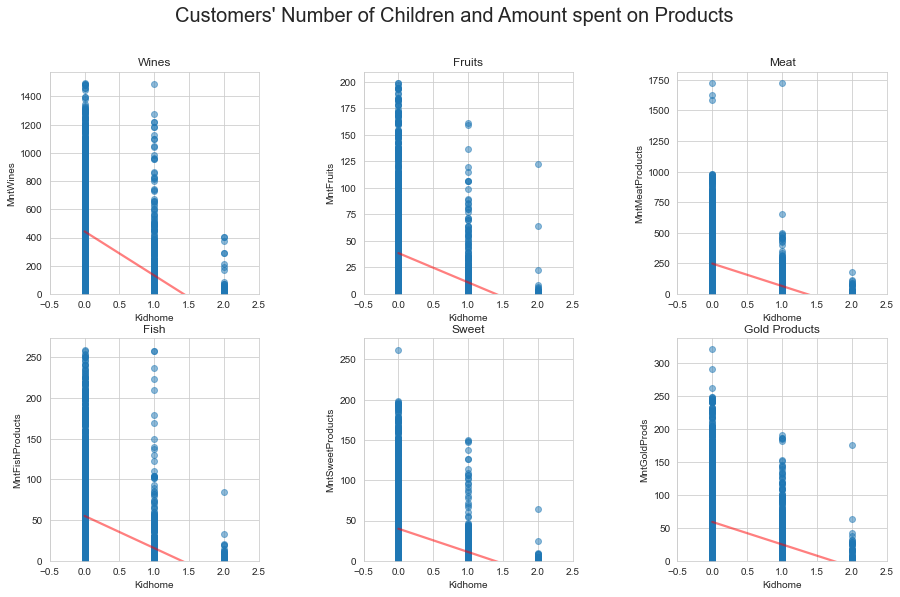

In [41]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 9))
fig.suptitle( 'Customers\' Number of Children and Amount spent on Products', fontsize = 20)
plt.subplots_adjust( wspace = 0.5, hspace = 0.2)

def desiredplot(Y, YLabel, row, col,  X = 'Kidhome'):
    sns.regplot( x = 'Kidhome', y = Y, data = df, ax = axs[row, col], 
            scatter_kws = { 'alpha': 0.5},line_kws = { 'color': 'red', 'alpha': 0.5}, ci = None)
    axs[ row, col].set_title( YLabel)
    axs[ row, col].set_ylim( 0, )
    axs[ row, col].set_xlim( -0.5, 2.5)
    
desiredplot( Y = 'MntWines', YLabel = 'Wines', row = 0, col = 0)
desiredplot( Y = 'MntFruits', YLabel = 'Fruits', row = 0, col = 1)
desiredplot( Y = 'MntMeatProducts', YLabel = 'Meat', row = 0, col = 2)
desiredplot( Y = 'MntFishProducts', YLabel = 'Fish', row = 1, col = 0)
desiredplot( Y = 'MntSweetProducts', YLabel = 'Sweet', row = 1, col = 1)
desiredplot( Y = 'MntGoldProds', YLabel = 'Gold Products', row = 1, col = 2)

It is observed that number of children at home is negatively associated with amount spent on all products. Similary, reliability is questionable due to the high skewness of the distribution of number of children in customer's household.

<AxesSubplot:xlabel='Teenhome', ylabel='count'>

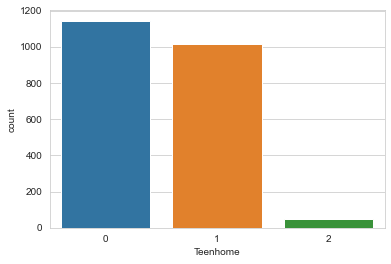

In [42]:
sns.countplot( x = 'Teenhome', data = df)

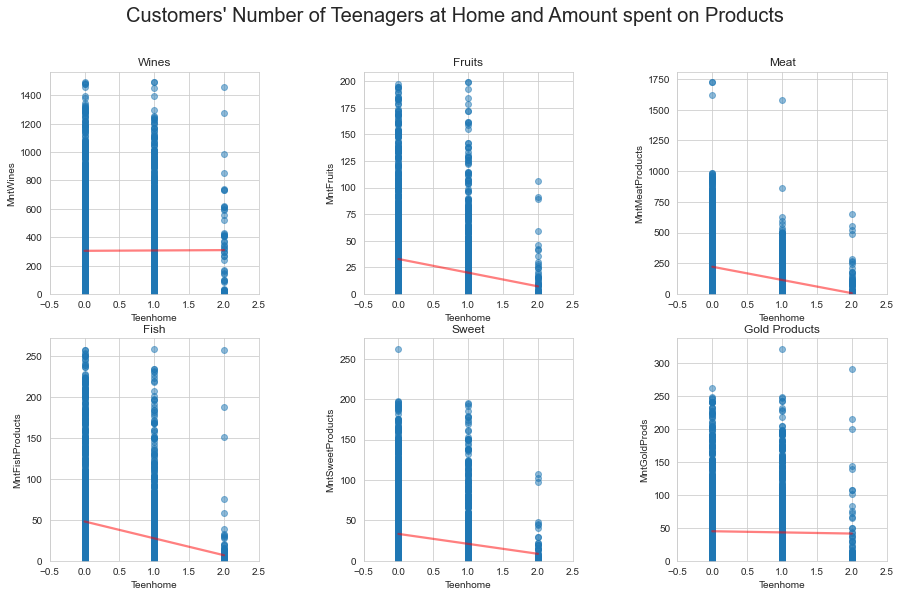

In [43]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 9))
fig.suptitle( 'Customers\' Number of Teenagers at Home and Amount spent on Products', fontsize = 20)
plt.subplots_adjust( wspace = 0.5, hspace = 0.2)


def desiredplot(Y, YLabel, row, col,  X = 'Teenhome'):
    sns.regplot( x = 'Teenhome', y = Y, data = df, ax = axs[row, col], 
            scatter_kws = { 'alpha': 0.5},line_kws = { 'color': 'red', 'alpha': 0.5}, ci = None)
    axs[ row, col].set_title( YLabel)
    axs[ row, col].set_ylim( 0, )
    axs[ row, col].set_xlim( -0.5, 2.5)
    
desiredplot( Y = 'MntWines', YLabel = 'Wines', row = 0, col = 0)
desiredplot( Y = 'MntFruits', YLabel = 'Fruits', row = 0, col = 1)
desiredplot( Y = 'MntMeatProducts', YLabel = 'Meat', row = 0, col = 2)
desiredplot( Y = 'MntFishProducts', YLabel = 'Fish', row = 1, col = 0)
desiredplot( Y = 'MntSweetProducts', YLabel = 'Sweet', row = 1, col = 1)
desiredplot( Y = 'MntGoldProds', YLabel = 'Gold Products', row = 1, col = 2)

It is observed that number of children at home is negatively associated with amount spent on Fruits, Meat Products, Fish Products and Sweet Products. Similary, reliability is questionable due to the high skewness of the distribution of number of teenagers in customer's household.

## Linear regression to predict sales

In this section, I attempt to use linear regression to predict customers' amount spent on different products.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
X = df[ ['Education', 'Income', 'Kidhome', 'Teenhome', 'Complain']]
Y = df[ ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

In [46]:
X_dum = pd.get_dummies( X, columns = ['Education'], drop_first = True) # Convert Education Level into a dummy variable
X_dum.head(10)

,Income,Kidhome,Teenhome,Complain,Education_Graduation,Education_2n Cycle,Education_Master,Education_PhD
0,84835.0,0,0,0,1,0,0,0
1,57091.0,0,0,0,1,0,0,0
2,67267.0,0,1,0,1,0,0,0
3,32474.0,1,1,0,1,0,0,0
4,21474.0,1,0,0,1,0,0,0
5,71691.0,0,0,0,0,0,0,1
6,63564.0,0,0,0,0,1,0,0
7,44931.0,0,1,0,1,0,0,0
8,65324.0,0,1,0,0,0,0,1
9,65324.0,0,1,0,0,0,0,1


### Wines

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntWines'], test_size = 0.3)

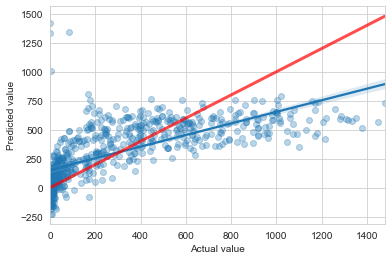

In [48]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_wines = y_test
predicted_wines = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [49]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_wines'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = coef_[ 'ScaledCoefficient_wines']

Text(0.5, 1.0, "Factors' importance in determining sales in Wines")

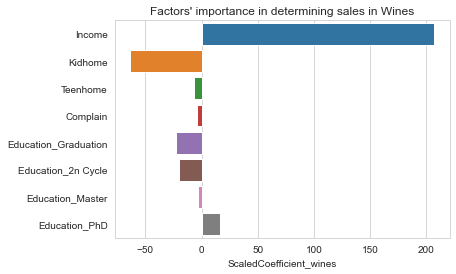

In [50]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_wines', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales in Wines')

### Fruits

In [51]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntFruits'], test_size = 0.3)

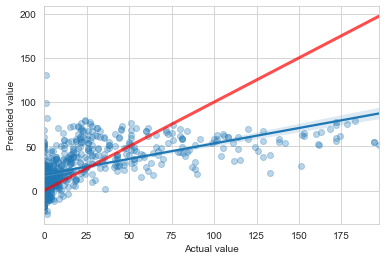

In [52]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_fruits = y_test
predicted_fruits = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [53]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_fruits'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = pd.concat( [ coef_combined, coef_[ 'ScaledCoefficient_fruits']], axis = 1)

Text(0.5, 1.0, "Factors' importance in determining sales in Fruits")

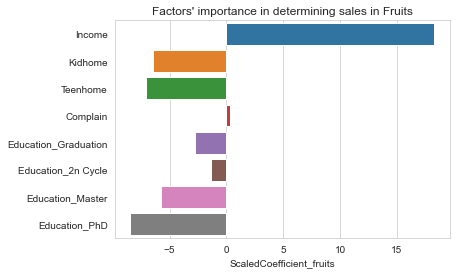

In [54]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_fruits', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales in Fruits')

### Meat Products

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntMeatProducts'], test_size = 0.3)

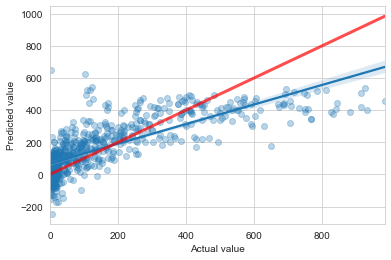

In [56]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_meat = y_test
predicted_meat = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [57]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_meat'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = pd.concat( [ coef_combined, coef_[ 'ScaledCoefficient_meat']], axis = 1)

Text(0.5, 1.0, "Factors' importance in determining sales Meat")

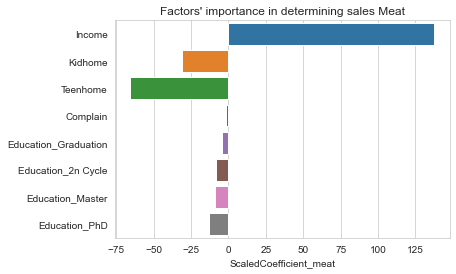

In [58]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_meat', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales Meat')

### Fish Products

In [59]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntFishProducts'], test_size = 0.3)

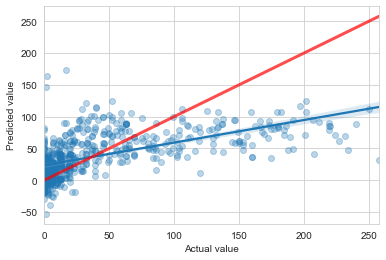

In [60]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_fish = y_test
predicted_fish = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [61]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_fish'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = pd.concat( [ coef_combined, coef_[ 'ScaledCoefficient_fish']], axis = 1)

Text(0.5, 1.0, "Factors' importance in determining sales in Fish Products")

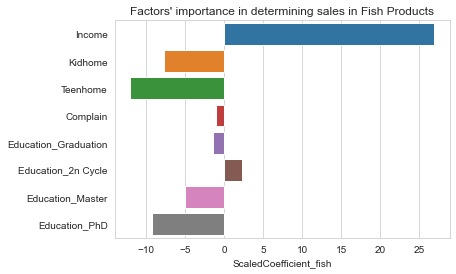

In [62]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_fish', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales in Fish Products')

### Sweet Products

In [63]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntSweetProducts'], test_size = 0.3)

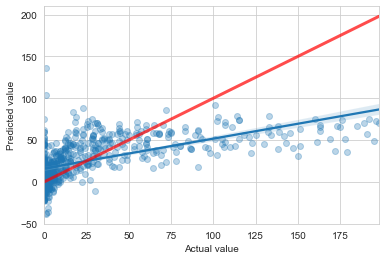

In [64]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_sweet = y_test
predicted_sweet = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [65]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_sweet'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = pd.concat( [ coef_combined, coef_[ 'ScaledCoefficient_sweet']], axis = 1)

Text(0.5, 1.0, "Factors' importance in determining sales in Sweet Products")

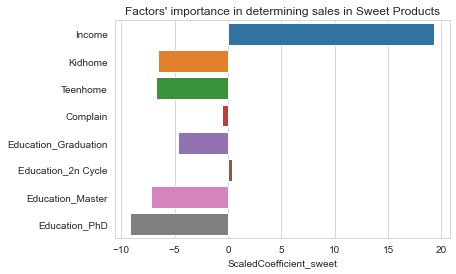

In [66]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_sweet', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales in Sweet Products')

### Gold Products

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X_dum, Y['MntGoldProds'], test_size = 0.3)

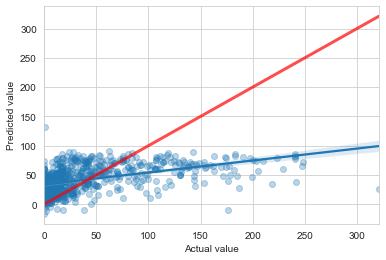

In [68]:
lm = LinearRegression()
lm.fit( X_train, y_train)
predictions = lm.predict( X_test)
actual_gold = y_test
predicted_gold = pd.Series( predictions)

g = sns.regplot( x = y_test, y = predictions, scatter_kws={'alpha':0.3})
plt.xlabel( 'Actual value')
plt.ylabel( 'Predicted value')

max_ = y_test.max()
g.plot([0, max_], [0, max_], 'red', linewidth=3, alpha = 0.7)

In [69]:
coef_ = pd.DataFrame( data = lm.coef_, index = X_test.columns, columns = ['Coefficient'])
coef_[ 'ScaledCoefficient_gold'] = coef_[ 'Coefficient'] * X_test.std( axis = 0)
coef_combined = pd.concat( [ coef_combined, coef_[ 'ScaledCoefficient_gold']], axis = 1)

Text(0.5, 1.0, "Factors' importance in determining sales in Gold Products")

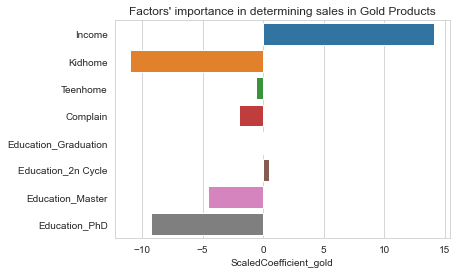

In [70]:
sns.barplot( y = coef_.index, x = 'ScaledCoefficient_gold', data = coef_, orient = 'h')
plt.title( 'Factors\' importance in determining sales in Gold Products')

In [71]:
coef_combined

,ScaledCoefficient_wines,ScaledCoefficient_fruits,ScaledCoefficient_meat,ScaledCoefficient_fish,ScaledCoefficient_sweet,ScaledCoefficient_gold
Income,207.135065,18.289370,137.580517,26.957305,19.326567,14.131525
Kidhome,-63.712370,-6.497948,-30.864575,-7.660776,-6.531055,-10.998305
Teenhome,-6.689132,-7.086027,-65.864185,-12.093188,-6.742963,-0.586748
Complain,-4.366858,0.340285,-1.523628,-0.987274,-0.584376,-1.973582
Education_Graduation,-22.950786,-2.726204,-4.112972,-1.420012,-4.709427,0.058912
Education_2n Cycle,-20.198819,-1.344849,-8.418245,2.273694,0.335900,0.483883
Education_Master,-2.853986,-5.763103,-8.717218,-5.042755,-7.175973,-4.573533
Education_PhD,16.259324,-8.487370,-13.303079,-9.206876,-9.193182,-9.273187


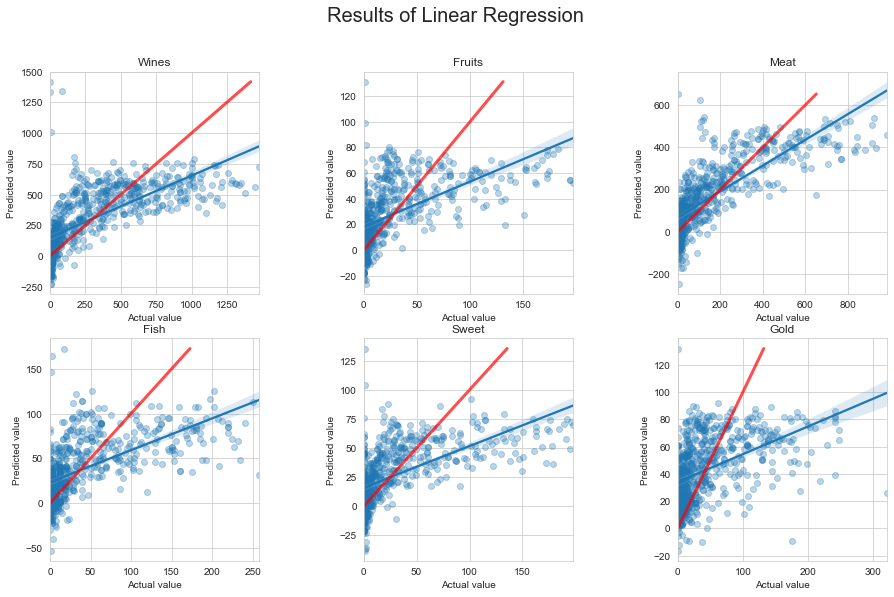

In [72]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 9))
fig.suptitle( 'Results of Linear Regression', fontsize = 20)
plt.subplots_adjust( wspace = 0.5, hspace = 0.2)


def regressionplot( X, Y, YLabel, row, col):
    temp = pd.concat
    g = sns.regplot( x = X, y = Y, ax = axs[row, col], scatter_kws = { 'alpha': 0.3})
    max_ = Y.max()
    g.plot( [0, max_], [0, max_], 'red', linewidth = 3, alpha = 0.7)
    axs[ row, col].set_title( YLabel)
    axs[ row, col].set_xlabel( 'Actual value')
    axs[ row, col].set_ylabel( 'Predicted value')

regressionplot( X = actual_wines, Y = predicted_wines, YLabel = 'Wines', row = 0, col = 0)
regressionplot( X = actual_fruits, Y = predicted_fruits, YLabel = 'Fruits', row = 0, col = 1)
regressionplot( X = actual_meat, Y = predicted_meat, YLabel = 'Meat', row = 0, col = 2)
regressionplot( X = actual_fish, Y = predicted_fish, YLabel = 'Fish', row = 1, col = 0)
regressionplot( X = actual_sweet, Y = predicted_sweet, YLabel = 'Sweet', row = 1, col = 1)
regressionplot( X = actual_gold, Y = predicted_gold, YLabel = 'Gold', row = 1, col = 2)

From the graphs, it is seen that the regression models do not fit the data well.The predicted values are unreliable.

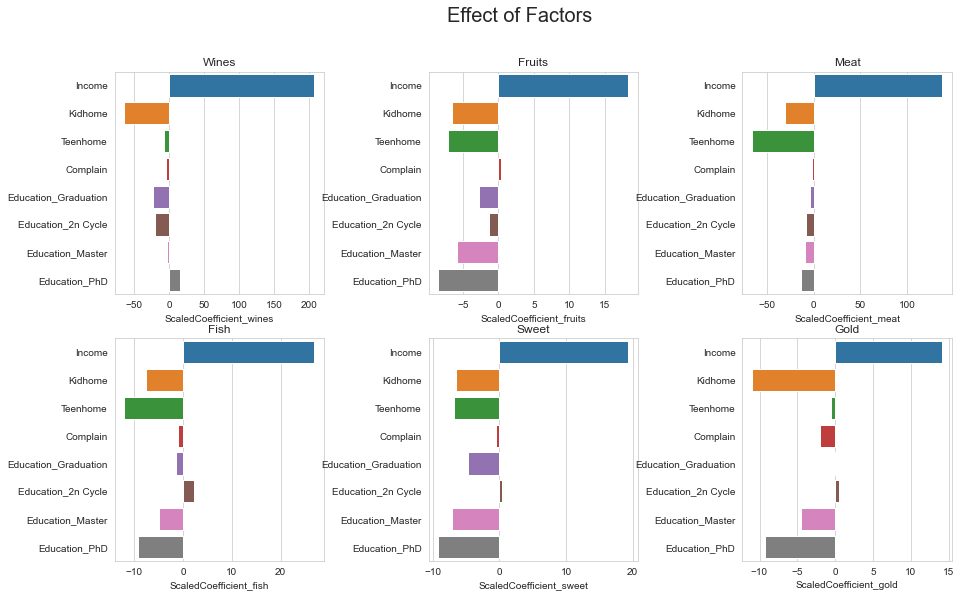

In [73]:
fig, axs = plt.subplots( ncols = 3, nrows = 2, figsize = (15, 9))
fig.suptitle( 'Effect of Factors', fontsize = 20)
plt.subplots_adjust( wspace = 0.5, hspace = 0.2)


def effectplot( X, Label, row, col):
    g = sns.barplot( y = coef_combined.index, x = X, data = coef_combined, orient = 'h', ax = axs[ row, col])
    axs[ row, col].set_title( Label)
    '''
    sns.barplot( y = coef_.index, x = 'ScaledCoefficient_gold', data = coef_, orient = 'h')
    plt.title( 'Factors\' importance in determining sales in Gold Products')
    '''

effectplot( X = 'ScaledCoefficient_wines', Label = 'Wines', row = 0, col = 0)
effectplot( X = 'ScaledCoefficient_fruits', Label = 'Fruits', row = 0, col = 1)
effectplot( X = 'ScaledCoefficient_meat', Label = 'Meat', row = 0, col = 2)
effectplot( X = 'ScaledCoefficient_fish', Label = 'Fish', row = 1, col = 0)
effectplot( X = 'ScaledCoefficient_sweet', Label = 'Sweet', row = 1, col = 1)
effectplot( X = 'ScaledCoefficient_gold', Label = 'Gold', row = 1, col = 2)

From the charts, it is seen that customers' income is the most positively correlated with amount of purchase in wines and meat.

Number of kids at home is negatively associated with the amount of purchase in wines, which is quite reasonable.

Number of teens at home is negatively assocaited with the amount of purchase in meat. The association is strong but counter-intuitive.

Other factors do not have a strong contribution to the prediction of amount spent by customers.

# Insight

From the results of the multiple linear regression, it is concluded that income is the strongest determinants of cusotmers' purchase amount. Income level is highly associated with the purchase amount in Wines and Meat.

Marketing strategies can target groups with specific income levels to leverage the effect of customers' income level on sales amount.

Diversification of brands sold can also be explored in Fruits, Fish, Sweet products and Gold products, to further exploit the buying power of customerrs with high income.

# Misc.

Saving the dataframe for further processing

In [74]:
%store df

Stored 'df' (DataFrame)
